# Hypothesis Testing: Goals in Men's vs Women's World Cup Matches

This project compares the number of goals scored per match in men's and women's FIFA World Cup games using statistical hypothesis testing.

The analysis focuses on selecting appropriate tests based on data distribution and interpreting results in a reproducible way.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
import pingouin as pg


In [2]:
men_wc = pd.read_csv("../data/men_results.csv")
women_wc = pd.read_csv("../data/women_results.csv")

men_wc.head(), women_wc.head()

(   Unnamed: 0        date home_team away_team  home_score  away_score  \
 0           0  1872-11-30  Scotland   England           0           0   
 1           1  1873-03-08   England  Scotland           4           2   
 2           2  1874-03-07  Scotland   England           2           1   
 3           3  1875-03-06   England  Scotland           2           2   
 4           4  1876-03-04  Scotland   England           3           0   
 
   tournament  
 0   Friendly  
 1   Friendly  
 2   Friendly  
 3   Friendly  
 4   Friendly  ,
    Unnamed: 0        date home_team  away_team  home_score  away_score  \
 0           0  1969-11-01     Italy     France           1           0   
 1           1  1969-11-01   Denmark    England           4           3   
 2           2  1969-11-02   England     France           2           0   
 3           3  1969-11-02     Italy    Denmark           3           1   
 4           4  1975-08-25  Thailand  Australia           3           2   
 
     

## Data Preparation

The datasets are filtered to include only FIFA World Cup matches played after 2002.
Total goals per match are calculated as the sum of home and away goals.


In [3]:
men_wc.loc[:, "total_goals"] = men_wc["home_score"] + men_wc["away_score"]
women_wc.loc[:, "total_goals"] = women_wc["home_score"] + women_wc["away_score"]


## Exploratory Analysis

The distribution of total goals per match is explored for men's and women's World Cup games.


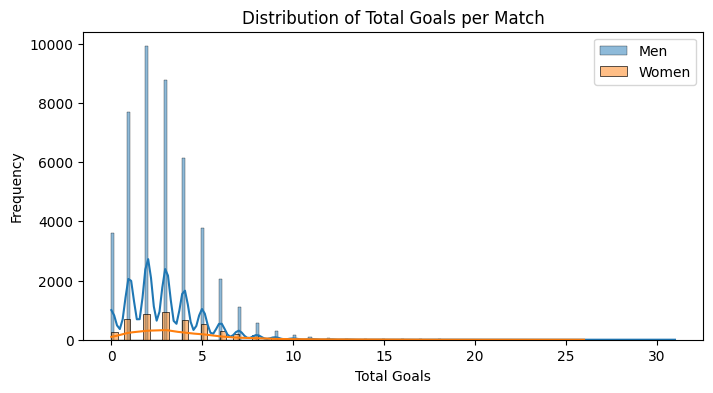

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(men_wc["total_goals"], label="Men", kde=True)
sns.histplot(women_wc["total_goals"], label="Women", kde=True)
plt.legend()
plt.title("Distribution of Total Goals per Match")
plt.xlabel("Total Goals")
plt.ylabel("Frequency")
plt.show()


## Normality Assumption

Normality of goal distributions is evaluated using the Shapiro–Wilk test.


In [5]:
shapiro_men = shapiro(men_wc["total_goals"])
shapiro_women = shapiro(women_wc["total_goals"])

shapiro_men, shapiro_women


C:\Users\tano2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44353.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=np.float64(0.8972436900357965), pvalue=np.float64(5.9075824703753694e-95)),
 ShapiroResult(statistic=np.float64(0.861581958610495), pvalue=np.float64(2.1700234058009497e-54)))

## Hypothesis Testing

- **H₀**: The distribution of goals per match is the same in men's and women's World Cup matches.
- **H₁**: Women's World Cup matches have a higher number of goals per match than men's matches.

Given the lack of normality, a Mann–Whitney U test is applied.


In [6]:
mwu = pg.mwu(
    x=women_wc["total_goals"],
    y=men_wc["total_goals"],
    alternative="greater"
)

mwu


,U-val,alternative,p-val,RBC,CLES
MWU,125364460.5,greater,1.997765e-75,0.157459,0.57873


In [7]:
p_val = mwu["p-val"].iloc[0]
p_val


np.float64(1.9977650531428883e-75)

## Conclusions

- Goal distributions for both men's and women's World Cup matches deviate from normality.
- A non-parametric Mann–Whitney U test was therefore applied.
- Results indicate that women's World Cup matches tend to have a higher number of goals per match than men's matches.
